<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> Programación cientifica en Python</h1>
    <h1> Tópico 1: Introducción y numpy</h1>
    <h3> _Abril 2018_</h3>
</center>

_Notebook created by Roberto Fuentes - `roberto.fuentes@alumnos.usm.cl`- DI UTFSM ._

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from mpl_toolkits.axes_grid1 import make_axes_locatable
import librosa.display
import IPython.display as ipd

## Tabla de contenidos
* [1.- IPython](#ipython)
* [2.- Jupyter Notebook](#jupyter)
* [3.- Magics](#magics)
* [4.- NumPy](#numpy)
* [5.- Dentro de Numpy](#internals) 
* [6.- Programando eficientemente con NumPy](#efficient)

<div id='ipython' />
## 1.- IPython

_IPython_ no es mas que una versión mejorada del shell de _Python_ estándar, que proporciona herramientas para computación interactiva.

Algunas características interesantes de _IPython_ son:

* Mejor resaltado de sintaxis.
* Acceso directo a los comandos bash / linux (`cd`,` ls`, `pwd`,` rm`, `mkdir`, etc.). Los comandos adicionales se pueden ejecutar con: `! Command`.
* comando `who` para ver las variables definidas en la sesión actual.
* Inspeccionar los objetos con `?`.
* Y __magics__, que veremos en breve.

## Algunos ejemplos

In [2]:
!ls

01_Intro_numpy.ipynb  __pycache__           cpp_ext.py
IsotipoDIisocolor.png _temp                 data
Solutions             _temp.cpp             escudo_utfsm.gif


In [3]:
!pwd

/Users/Roberto/Usm/USM-2018/Taller_SciProg/01_Intro_numpy


In [4]:
!mkdir Ejemplo

In [5]:
!cd Ejemplo/

In [6]:
!echo "Soy un ejemplo! :)" > Ejemplo/myfile.txt

In [7]:
!ls Ejemplo/

myfile.txt


In [8]:
!rm -R Ejemplo/

In [9]:
who

ipd	 librosa	 make_axes_locatable	 np	 plt	 sp	 


In [10]:
?np

<div id='jupyter' />
## 2.- Jupyter Notebook

Es un entorno interactivo basado en web que combina **codigo**, **imagenes**, **videos**, **animaciones**, **matemática**, **lenguaje markdown ** and **gráficos (plot)** en un solo documento. Esta herramienta es un buen comienzo para la computación numérica y el *DataScience* en Python.

# Podemos construir titulos grande

#### o titulos más pequeños

Podemos crear **textos cons links** [links](http://ipython.org)

Tambien podemos escribir ecuaciones como en LaTeX:
$$
E_T = \sum_{l=1}^{N} \sum_{x_k \in \Omega_l} \left( F\left(x_k,S_i(x_k), S_i'(x_k),S_i''(x_k)\right)\right)^2.
$$

Codigo con sintaxis _highlighting_ (resaltado):
```python
def fibonacci(n):
  if n <= 1:
    return n
  else:
    return fibonacci(n-1) + fibonacci(n-2)
```
Podemos mostrar imagenes!: ![This is an image](data/white_fox.jpg)

y distintos plots:

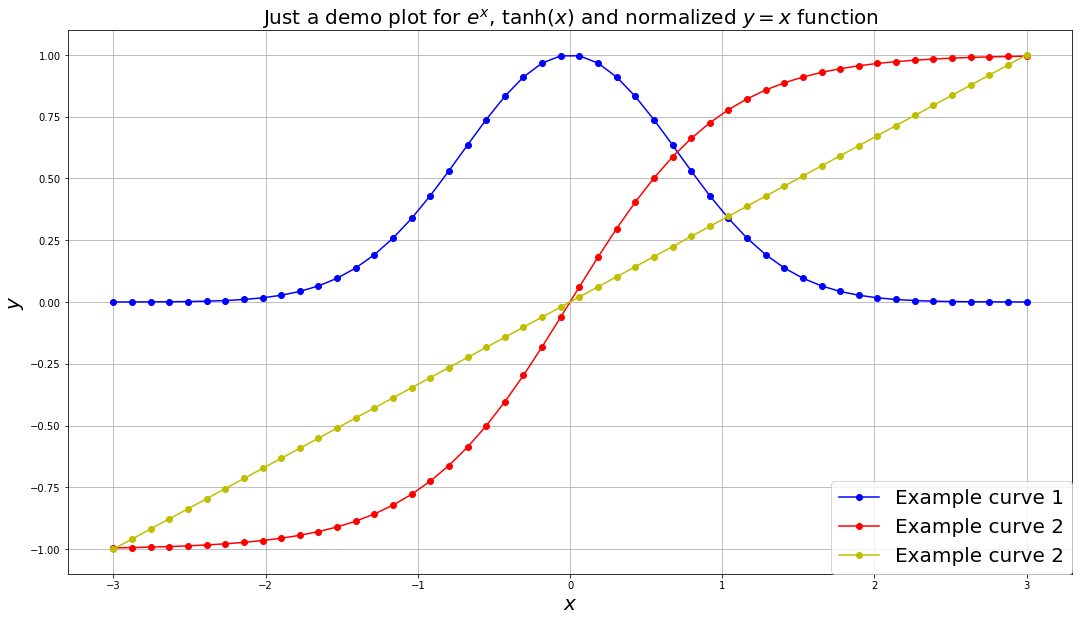

In [11]:
xgrid = np.linspace(-3,3,50)
f1 = np.exp(-xgrid**2)
f2 = np.tanh(xgrid)
f3 = xgrid/max(xgrid)
fig = plt.figure(figsize=(18, 10))
plt.plot(xgrid, f1, 'bo-', label = "Example curve 1")
plt.plot(xgrid, f2, 'ro-', label = "Example curve 2")
plt.plot(xgrid, f3, 'yo-', label = "Example curve 2")
plt.legend(loc=4, borderaxespad=0., fontsize = 20)
plt.grid()
plt.xlabel(r"$x$",fontsize = 20)
plt.ylabel(r"$y$",fontsize = 20)
plt.title(r"Just a demo plot for $e^x$, $\tanh(x)$ and normalized $y = x$ function",fontsize = 20)
plt.show()

_Ipython_ tambien cuenta con un sofisticado sistema de *display* que nos permite insertar elementos web en los _notebooks_. Aqui tenemos por ejemplo un video de **Youtube** mostrado directamente en el _notebook_:  

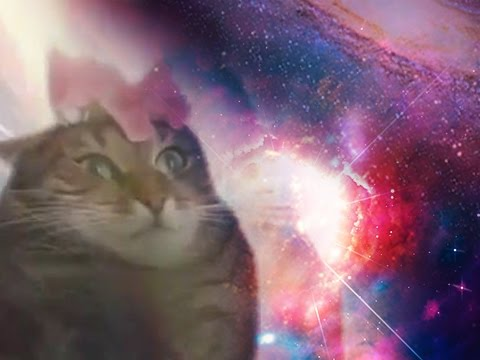

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('uwmeH6Rnj2E')

Incluso podemos mostrar audio en distintos formatos:

In [13]:
x, sr = librosa.load('data/dejavu.wav')

In [14]:
ipd.Audio(x, rate=sr)

<div id='magics' />
## 3.- Magics

Los _magics_ son comandos "customizados" que permiten interactuar directamente con nuestro SO y el sistema de archivos del computador. Existen dos tipos de *line magics*:

* `%` (El cual solo afecta a la linea en custion).
* `%%` (El cual afecta a toda la celda).

Aqui tenemos algunos `magics` útiles:

In [15]:
# this will list all magic commands
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [16]:
# also work in ls, cd, mkdir, etc
%pwd

'/Users/Roberto/Usm/USM-2018/Taller_SciProg/01_Intro_numpy'

In [17]:
%history

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from mpl_toolkits.axes_grid1 import make_axes_locatable
import librosa.display
import IPython.display as ipd
!ls
!pwd
!mkdir Ejemplo
!cd Ejemplo/
!echo "Soy un ejemplo! :)" > Ejemplo/myfile.txt
!ls Ejemplo/
!rm -R Ejemplo/
who
?np
xgrid = np.linspace(-3,3,50)
f1 = np.exp(-xgrid**2)
f2 = np.tanh(xgrid)
f3 = xgrid/max(xgrid)
fig = plt.figure(figsize=(18, 10))
plt.plot(xgrid, f1, 'bo-', label = "Example curve 1")
plt.plot(xgrid, f2, 'ro-', label = "Example curve 2")
plt.plot(xgrid, f3, 'yo-', label = "Example curve 2")
plt.legend(loc=4, borderaxespad=0., fontsize = 20)
plt.grid()
plt.xlabel(r"$x$",fontsize = 20)
plt.ylabel(r"$y$",fontsize = 20)
plt.title(r"Just a demo plot for $e^x$, $\tanh(x)$ and normalized $y = x$ function",fontsize = 20)
plt.show()
from IPython.display import YouTubeVideo
YouTubeVideo('uwmeH6Rnj2E')
x, sr = librosa.load('data/dejavu.wav')
ipd.Audio(x, rate=sr)
# this will list al

In [18]:
# this will execute and show the output of the program
%run ./data/hola_mundo.py

Hola, soy un ejemplo =)!


In [19]:
def Evitame():
    for i in range(100):
        for j in range(100):
            for k in range(100):
                a = 1+1
    return None

%timeit -n 10 Evitame()

107 ms ± 4.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%time Evitame()

CPU times: user 123 ms, sys: 2.97 ms, total: 126 ms
Wall time: 126 ms


In [21]:
%%bash
cd ..
ls

01_Intro_numpy


In [22]:
%%writefile myfile.txt
R: Holanda que talca como andamio que container que acelga!
P: No sapa naipe hermanito.

Writing myfile.txt


In [23]:
!cat myfile.txt
!rm myfile.txt

R: Holanda que talca como andamio que container que acelga!
P: No sapa naipe hermanito.

### Escribe tus propios _magics_ !

Ahora veremos como crear un nuevo _cell magic_ que compile y ejecute codigo C++ en nuestro notebook: 

In [24]:
from IPython.core.magic import register_cell_magic

Para comenzar, crearemos una funcion que tome una linea y el contenido de una celda como sus argumentos, y la *decoraremos* con `@register_cell_magic`.

In [25]:
@register_cell_magic
def cpp(line,cell):
    """Compile, execute C++ code, and return the
    standard output."""
    # We first retrieve the current IPython interpreter instance.
    ip = get_ipython()
    # We define the source and executable filenames.
    source_filename = '_temp.cpp'
    program_filename = '_temp'
    # We write the code to the C++ file.
    with open(source_filename, 'w') as f:
        f.write(cell)
    # We compile the C++ code into an executable.
    compile = ip.getoutput("g++ {0:s} -o {1:s}".format(
              source_filename, program_filename))
    # We execute the executable and return the output.
    output = ip.getoutput('./{0:s}'.format(program_filename))
    print(output[0])

In [26]:
%%cpp
#include<iostream>
int main() 
{
    std::cout << "Hello world!";
}

Hello world!


Sin embargo esta _cell magic_ es valida solo dentro del _notebook_ donde se creó. Para usarla en otros _notebooks_ se puede crear una extensión de _Ipython_ (**IPython extension**). Para esto, copie la definición de la función `cpp()` (sin el decorador) en un modulo de Python, llamada `cpp_ext.py` para este ejemplo. Luego, agregue esto al final de su archivo:

```python
def load_ipython_extension(ipython):
       """This function is called when the extension is loaded.
       It accepts an IPython InteractiveShell instance.
       We can register the magic with the `register_magic_function`
       method of the shell instance."""
       ipython.register_magic_function(cpp, 'cell')
```

Puedes cargar la extensión con %load_ext cpp_ext. Recuerda que tu archivo cpp_ext.py debe estar donde se encuentre tu _notebook_ (mismo directorio).

In [27]:
%load_ext cpp_ext

In [28]:
%%cpp
#include<iostream>
int main() 
{
    std::cout << "Hello world!";
}

Hello world!


## Actividad 1

Desarrolle una extensión de `IPython` (llamada `2to3_ext.py`) implementando un `cell magic`, que reciba en su celda un código en `Python2`, lo transforme a código compatible con `Python3`, y finalmente lo ejecute en una instancia del `IPython3`, imprimiendo en la salida. 

La entrega consiste en la extensión (`2to3_ext.py`) + un notebook de ejemplo de su extensión ejecutada con el código de a continuación:

```python
a = 3
b = 4
c = 5

if a>(b+c) or b>(a+c) or c>(a+b):
	print "Ingrese un traingulo valido."
elif a==b and b==c:
	print "Triangulo equilatero."
elif a==b or b==c or a==c:
	print "Triangulo isoceles."
else:
	print "Triangulo escaleno."
```

**Nota:** Consideraremos que las únicas diferencias entre `Python2` y `Python3` son los `print`.

<div id='numpy' />
# 4.- NumPy

## Operadores básicos en _NumPy_

La razon de porque se debe usar _NumPy_ en vez de un objeto iterable en Python son:
* _NumPy_ provee una estructura de arreglos (_ndarrays_) que guarda la data **de forma contigua**.
* _NumPy_ tiene implemnetado **operaciones matemáticas muy veloces** sobre los _ndarrays_ que explota el formato de guardado de estos (forma contigua).
* **Sintaxis corto para operaciones entre arrays**. Un lenguaje como C o Java requiere de un for para escribir operaciones tan simples como $C = A + B$.

### Creando nuestros primeros arreglos

Hay muchas funciones en _NumPy_ para crear distintos tipos de arreglos. A continuación se muestra una lista de los comandos más usados:

In [29]:
# Arrays of zeros: np.zeros(shape)
print("Matriz de ceros:")
print( np.zeros((3,3)) )

# Arrays of ones: np.ones(shape)
print("\nMatriz de unos:")
print( np.ones((3,3)) )

# Empty array: np.empty(shape)
print("\nArreglos vacios:")
print( np.empty((3,3)) )

# Range of values: np.range(start, stop, step)
print("\nRange:")
print( np.arange(0., 10., 1.) )

# Regular grid: np.linspace(start, end, n_values)
print("\nGrilla Regular:")
print( np.linspace(0., 1., 9) )

# Random secuences: np.random
print("\nSecuencia Random:")
print( np.random.uniform(10, size=6) )

# Array constructor: np.array( python_iterable )
print("\nConstrucción de un array en NumPy")
print( np.array([2, 3, 5, 10, -1]) )

Matriz de ceros:
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

Matriz de unos:
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]

Arreglos vacios:
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]

Range:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]

Grilla Regular:
[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]

Secuencia Random:
[ 2.1775265   9.09747786  9.25243421  7.74826933  2.51667799  6.23631097]

Construcción de un array en NumPy
[ 2  3  5 10 -1]


### Operaciones básicas

Muchas de las operaciones en _NumPy_ son del tipo **element-wise**, es decir, realizar el computo $C = A + B$ se traduce en $C[i,j] = A[i,j] + B[i,j]$. A continuación se muestran algunas de las operaciones mas usuales (Para ver más funciones puede entrar aqui: [NumPy mathematical functions](https://docs.scipy.org/doc/numpy/reference/routines.math.html). )

In [30]:
# first we create two random arrays:
A = np.random.random((5,5))
B = np.random.random((5,5))

# sum
print("Suma:")
print( A+B )

# subtraction
print("\nResta")
print( A-B )

# product
print("\nProducto")
print( A*B )

# matricial product
print("\nProducto Matricial ")
print( np.dot(A,B) )

# power
print("\nPotencia")
print( A**2 )

# Some common mathematical functions
print("\n np.exp()")
print( np.exp(A) )
print("\n np.sin()")
print( np.sin(A) )
print("\n np.cos()")
print( np.cos(A))
print("\n np.tan()")
print( np.tan(A) )

Suma:
[[ 0.9155623   0.9052639   1.80676021  1.58985073  0.72754618]
 [ 0.30592434  1.36940961  1.00640089  1.61678726  1.74934591]
 [ 1.74139832  1.41031593  1.28886625  1.23297514  0.2152026 ]
 [ 0.71548109  0.96705167  1.08880271  1.58006206  1.66672455]
 [ 0.80693834  0.96793296  0.62370593  0.54611192  1.26918323]]

Resta
[[ 0.00520415 -0.73315073  0.17141416 -0.3699797   0.08211908]
 [-0.17820066 -0.21300476 -0.4960781   0.15123627  0.18202173]
 [-0.08774882  0.32246983  0.25785488  0.33887608  0.07916301]
 [ 0.26933544  0.40470542  0.74949559  0.30121221  0.30326701]
 [ 0.05959677 -0.7463028  -0.19765319  0.18519465  0.48303803]]

Producto
[[ 0.20955681  0.07049818  0.80874991  0.5976851   0.13064497]
 [ 0.01545856  0.45747791  0.19168732  0.64778216  0.7567698 ]
 [ 0.75619206  0.47125106  0.39867177  0.35134767  0.01001134]
 [ 0.1098429   0.19285062  0.15593693  0.60146683  0.67149997]
 [ 0.16189943  0.09498159  0.08748558  0.06598529  0.34437508]]

Producto Matricial 
[[ 1.422

### Operaciones booleanas

Las comparaciones en NumPy trabajan tambien de forma _element wise_. Algunos ejemplos son:

In [31]:
# Creating two 2d-arrays
A = np.array( [[1, 2, 3], [2, 3, 5], [1, 9, 6]] )
B = np.array( [[1, 2, 3], [3, 5, 5], [0, 8, 5]] )

print("A > B:")
print( A > B )

print("\nA =< B:")
print( A <= B )

print("\n A==B:")
print( A==B )

print("\n A!=B:")
print( A!=B )

# Creating two 2d boolean arrays
C = A==B
D = A>=B

print("\n A and B:")
print( C & D)
print( np.logical_and(C,D) )

print("\n A or B:")
print( C | D)
print( np.logical_or(C,D) )

print("\n not A:")
print( ~C )
print( np.logical_not(C))

A > B:
[[False False False]
 [False False False]
 [ True  True  True]]

A =< B:
[[ True  True  True]
 [ True  True  True]
 [False False False]]

 A==B:
[[ True  True  True]
 [False False  True]
 [False False False]]

 A!=B:
[[False False False]
 [ True  True False]
 [ True  True  True]]

 A and B:
[[ True  True  True]
 [False False  True]
 [False False False]]
[[ True  True  True]
 [False False  True]
 [False False False]]

 A or B:
[[ True  True  True]
 [False False  True]
 [ True  True  True]]
[[ True  True  True]
 [False False  True]
 [ True  True  True]]

 not A:
[[False False False]
 [ True  True False]
 [ True  True  True]]
[[False False False]
 [ True  True False]
 [ True  True  True]]


<div id='internals' />
## Dentro de NumPy

### La estructura de los  `numpy.ndarray` 

_ndarray_ es un objeto de NumPy que nos permite crear un arreglo de $N$ dimensiones. Basicamente esta formado por:

1. Un número de **dimensiones**.
2. El porte de cada dimension (_shape_).
3. El **tipo de dato** (_dtype_).
4. El buffer de la data.
<img src='data/ndarray.png' style="width: 500px;">

### Veamos un problema interesante ...
Consideremos calcular la norma cuadradada de un vector ($\displaystyle || \mathbf{v} ||^2 = \mathbf{v} \cdot \mathbf{v}$) con las siguientes 4 implementaciones:

In [32]:
#Python Lists implementation
def norm_square_list(vector):
    norm = 0
    for v in vector:
        norm += v*v
    return norm

#Naive NumPy implementation
def norm_square_array(vector):
    norm = 0
    for v in vector:
        norm += v*v
    return norm

#Vectorized NumPy implementation
def norm_square_numpy(vector):
    return np.sum(vector * vector)

#Clever NumPy implementation
def norm_square_dot(vector):
    return np.dot(vector, vector)

#Vector to use - dimension 10^6
vector = range(1000000)
npvector = np.array(vector)

In [33]:
#Timing the list implementation
%timeit norm_square_list(vector)

228 ms ± 3.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
#Timing the naive array implementation
%timeit norm_square_array(npvector)

291 ms ± 6.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
#Timing the NumPy-vectorized implementation
%timeit norm_square_numpy(npvector)

4.77 ms ± 984 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
#Timing the clever NumPy-vectorized implementation
%timeit norm_square_dot(npvector)

1.13 ms ± 215 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Como se puede ver, suceden cosas interesantes. Vamos por partes "como dijo el descuartizador": 
* La implementación inicial en NumPy (*norm_square_array*) la cual itera sobre la data es actualmente **peor** que simplemente usar una lista en python. Esto ocurre porque el array es guardado en una representación de bajo nivel, y **debe ser convertido** en un objeto compatible con Python antes de ser retornado al usuario, causando una sobrecarga extra cada vez que accedes a un indice del arreglo.

* `norm_square_numpy` es mas lenta que la implementación _cleaver_ por dos razones:
    1. Hay un delta de tiempo que se gasta en asignar memoria para guardar el resultado temporal (vector x vector).
    2. Lo anterior crea dos loops implicitos, uno para la multiplicación y otro para la suma.
* La implementación _cleaver_ usa la función de NumPy *np.dot()*, la cual no necesita guardar los resultados intermedios, e itera una sola vez (a la velocidad del lenguaje C).

<div id='efficient' />
## Programando eficientemente con NumPy

### Operaciones de copiado _In-place_ e implicitas

Siempre que puedas, escoge las operaciones **in-place** sobre las **copias implicitas**. Esto te ayudara a ahorrar memoria (lo cual es menos trabajo para el pobre recolector de basura =)! ) y ejecutara de forma mas rápida tu código.

In [37]:
def id(x):
    """
    This function returns the memory
    block address of an array.
    """
    return x.__array_interface__['data'][0]

La computación de arreglos puede involucrar operaciones **in-place** (primer ejemplo: el arreglo se modifica) o las **copias implicitas** (segundo ejemplo: un nuevo arreglo es creado).

In [38]:
a = np.zeros(10); aid = id(a)

In [39]:
# in-place operation
a *= 2; id(a) == aid

True

In [40]:
# implicit-copy operation
a = a * 2; id(a) == aid

False

In [41]:
%%timeit 
a = np.ones(100000000)
a *= 2

570 ms ± 54.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
%%timeit
a = np.ones(100000000)
b = a * 2

1.12 s ± 192 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Broadcasting

No es necesario realizar un *reshape* sobre los arreglos para operar sobre ellos. *Broadcasting* es una característica de los arreglos de NumPy. En la imagen que se muestra acontinuación la memoria extra indicada por los cuadros con puntos nunca se asigna, pero puede ser conveniente pensar en las operaciones como si fuera así.
<img src='data/broadcasting.png' style="width: 600px;">

__Como funciona:__ Los dos arreglos que estan involucrados en esta operación deben tener en común al menos una dimensión. El arreglo con menor dimensión se extenderá de forma **lógica** para hacer el *match* con la dimensión del otro arreglo.

In [43]:
# array([0,1,2]) + 5
np.arange(3) + 5

array([5, 6, 7])

In [44]:
# array([[1, 1 ,1], [1, 1, 1], [1, 1, 1]]) + array([0, 1, 2])
np.ones((3,3)) + np.arange(3)

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [45]:
# array([[0], [1], [2]]) + array([0, 1 ,2])
np.arange(3).reshape((3,1)) + np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Máscaras booleanas

Una técnica para acceder a un arreglo sin loops son las máscaras booleanas. Supongamos que queremos obtener todos los elementos de un arreglo menores que 0.5: 

In [46]:
def naive_indexing(vect):
    ret = list()
    for val in vect:
        if val < 0.5: ret.append(val)
    return np.array(ret)

#data to occupy and mask of booleans
vect = np.random.random_sample(1000000)
mask = vect < 0.5
mask

array([ True,  True,  True, ...,  True, False,  True], dtype=bool)

In [47]:
#naive indexing
%timeit naive_indexing(vect)

299 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
#mask indexing
%timeit vect[mask]

6.3 ms ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
naive_indexing(vect)

array([ 0.21665129,  0.30690918,  0.42369315, ...,  0.20019628,
        0.48105064,  0.40200185])

In [50]:
vect[mask]

array([ 0.21665129,  0.30690918,  0.42369315, ...,  0.20019628,
        0.48105064,  0.40200185])

## Actividad #2

In [51]:
def image_plot(data, title='FITS image'):
    plt.figure(figsize=(20,20))
    im = plt.imshow(data, cmap=plt.cm.afmhot, interpolation=None)
    plt.title(title)
    #plt.axis('off')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    plt.show()

In [52]:
def comparation_plot(img1, img2, etiqueta_1, etiqueta_2):
    fig = plt.figure(figsize=(20,20))
    a = fig.add_subplot(1,2,1)
    plt.imshow(img1, cmap='gray', interpolation=None)
    a.set_title(etiqueta_1)
    
    b = fig.add_subplot(1,2,2)
    plt.imshow(img2, cmap='gray', interpolation=None)
    b.set_title(etiqueta_2)

    plt.show()

In [53]:
# first we load the data:
data = np.load("data/red_fox.npy")

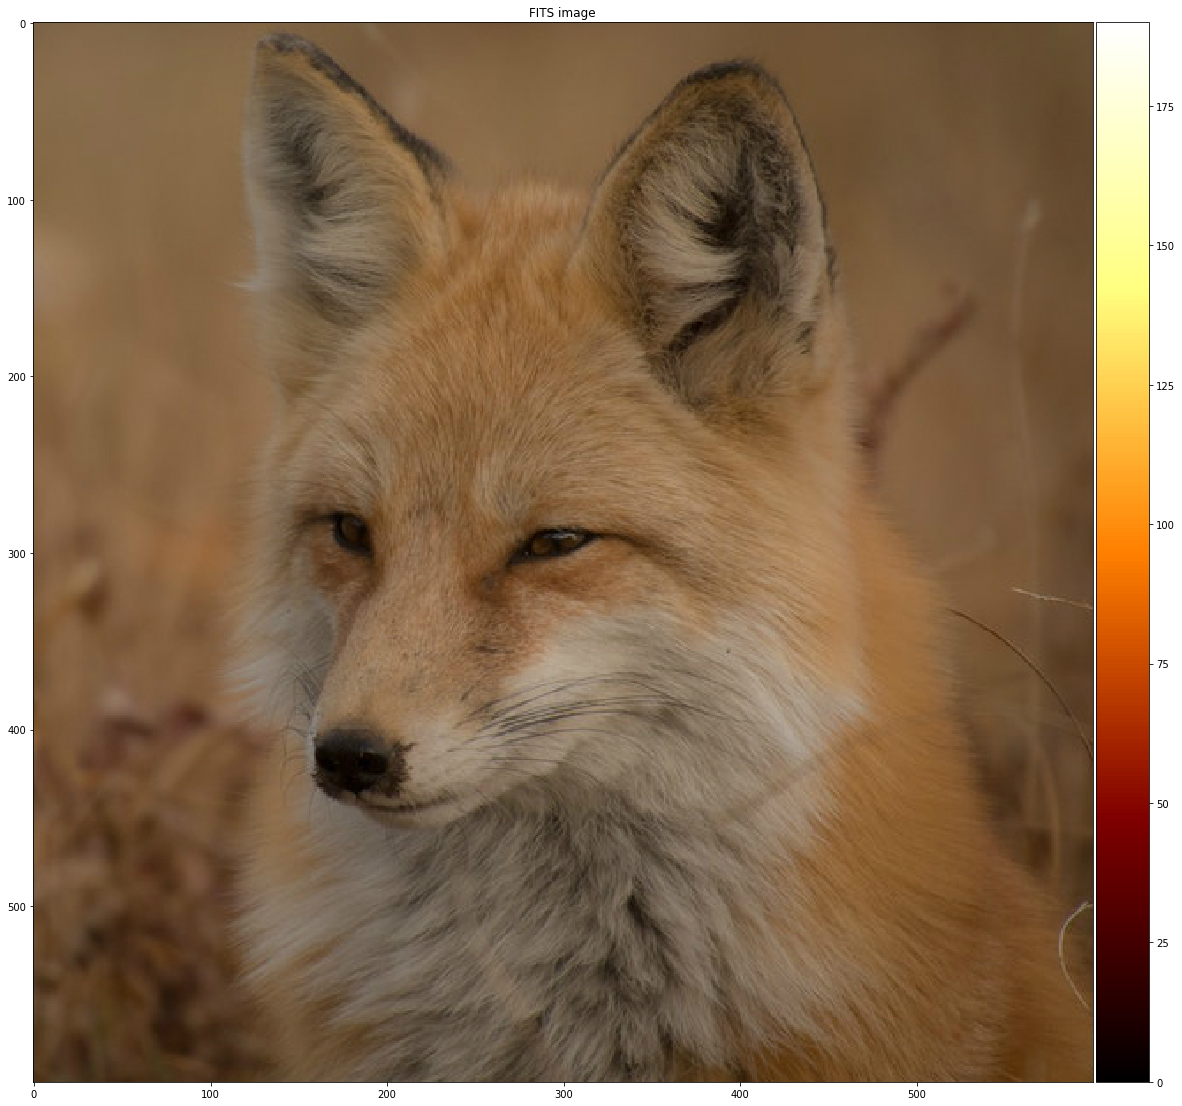

In [54]:
image_plot(data)

Usted deberá aplicar un filtro a la presente imagen. Para esto, debe separar su imagen en los 3 canales respectivos (Red, Green, Blue - RGB), trabajar con cada canal por separado y luego juntarlos. Los pasos que debe seguir por cada canal son los siguientes:

### Paso 1) 

Calcular el `RMS` de la imagen entregada. 

$$RMS = \sqrt{\frac{1}{m\ n} \sum_{i=1}^m \sum_{j=1}^n \texttt{data[i,j]}^2}$$

__Nota:__ Computarlo de forma vectorizada.

### Paso 2) 

Genere otro arreglo donde los pixeles con intensidades por debajo del `RMS` son considerados como _no usables_ (con valor `=0`).  Mostrar tal imagen resultante.

### Paso 3)

Crear la función
```python
def apply_filter(data, mask, kernel_filter):
    ...
    return None
```
Que reciba el arreglo de datos completo `data`, el arreglo booleano con los __pixeles usables__ `mask` (sobre el RMS), y kernel de filtro de `3x3`. La función debe convolucionar `filter` sobre la imagen `data`, sólo en los pixeles usables. La función debe retornar la data modificada.

Finalmente mostrar el resultado de convolucionar tal filtro en `data` (mostrar imágen).

__Nota:__ Debe usar siempre que pueda _instrucciones vectorizadas_.

__Image convolution:__ https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution

In [3]:
# Gaussian blur filter 3x3: Ocupar este filtro!
kernel_filter = 1./16. * np.array([[1,2,1], [2,4,2], [1,2,1]])
print(kernel_filter)

[[ 0.0625  0.125   0.0625]
 [ 0.125   0.25    0.125 ]
 [ 0.0625  0.125   0.0625]]
